In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tatsinskaya
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | gizo
Processing Record 7 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | pavlodar
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | manta
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | lagoa
Processin

Processing Record 37 of Set 4 | coquimbo
Processing Record 38 of Set 4 | kerouane
Processing Record 39 of Set 4 | camacha
Processing Record 40 of Set 4 | nakamura
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | custoias
Processing Record 43 of Set 4 | van
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | miles city
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | bowen
Processing Record 50 of Set 4 | sarakhs
Processing Record 1 of Set 5 | toliary
City not found. Skipping...
Processing Record 2 of Set 5 | alexandria
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | comarapa
Processing Record 5 of Set 5 | bukama
Processing Record 6 of Set 5 | surt
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | panaba
Processing Record 9 of Set 5 | kiama
Processing Record 10 of Set 5 | ponta d

Processing Record 21 of Set 8 | copandaro
City not found. Skipping...
Processing Record 22 of Set 8 | moose factory
Processing Record 23 of Set 8 | sindor
Processing Record 24 of Set 8 | alto baudo
City not found. Skipping...
Processing Record 25 of Set 8 | balabac
Processing Record 26 of Set 8 | neverkino
Processing Record 27 of Set 8 | chorbog
City not found. Skipping...
Processing Record 28 of Set 8 | airai
Processing Record 29 of Set 8 | ibb
Processing Record 30 of Set 8 | bambanglipuro
Processing Record 31 of Set 8 | goderich
Processing Record 32 of Set 8 | miyoshi
Processing Record 33 of Set 8 | tual
Processing Record 34 of Set 8 | itupiranga
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | kurilsk
Processing Record 37 of Set 8 | porto novo
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | lipin bor
Processing Record 40 of Set 8 | san quintin
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | gagino
Processi

Processing Record 6 of Set 12 | iberia
Processing Record 7 of Set 12 | athabasca
Processing Record 8 of Set 12 | yumen
Processing Record 9 of Set 12 | northam
Processing Record 10 of Set 12 | constitucion
Processing Record 11 of Set 12 | campestre
Processing Record 12 of Set 12 | zhezkazgan
Processing Record 13 of Set 12 | barmer
Processing Record 14 of Set 12 | husavik
Processing Record 15 of Set 12 | erzin
Processing Record 16 of Set 12 | takoradi
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | chernyshevskiy
Processing Record 19 of Set 12 | devils lake
Processing Record 20 of Set 12 | carauari
Processing Record 21 of Set 12 | sibolga
Processing Record 22 of Set 12 | leshukonskoye
Processing Record 23 of Set 12 | lamu
Processing Record 24 of Set 12 | zamora
Processing Record 25 of Set 12 | lardos
Processing Record 26 of Set 12 | phalodi
Processing Record 27 of Set 12 | tucuman
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | wat

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,62.60,33,40,23.04,AU,2020-12-02 02:17:42
1,Punta Arenas,-53.15,-70.92,39.20,78,75,20.80,CL,2020-12-02 02:20:18
2,Ushuaia,-54.80,-68.30,37.40,94,40,17.22,AR,2020-12-02 02:17:59
3,Albany,42.60,-73.97,41.00,52,32,1.01,US,2020-12-02 02:20:18
4,Gizo,-8.10,156.84,85.57,67,98,3.87,SB,2020-12-02 02:20:18
5,Mar Del Plata,-38.00,-57.56,66.20,77,0,13.87,AR,2020-12-02 02:20:18
6,East London,-33.02,27.91,62.10,65,96,19.35,ZA,2020-12-02 02:20:18
7,Atuona,-9.80,-139.03,78.49,75,1,14.65,PF,2020-12-02 02:20:18
8,Busselton,-33.65,115.33,70.00,52,0,1.99,AU,2020-12-02 02:20:18
9,Pavlodar,52.30,76.95,-7.60,76,90,2.93,KZ,2020-12-02 02:20:18


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-12-02 02:17:42,-42.88,147.33,62.60,33,40,23.04
1,Punta Arenas,CL,2020-12-02 02:20:18,-53.15,-70.92,39.20,78,75,20.80
2,Ushuaia,AR,2020-12-02 02:17:59,-54.80,-68.30,37.40,94,40,17.22
3,Albany,US,2020-12-02 02:20:18,42.60,-73.97,41.00,52,32,1.01
4,Gizo,SB,2020-12-02 02:20:18,-8.10,156.84,85.57,67,98,3.87


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

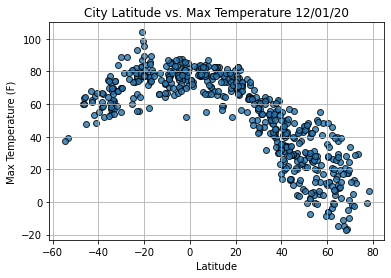

In [14]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

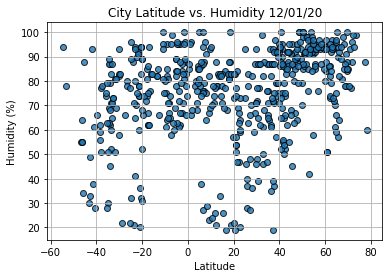

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

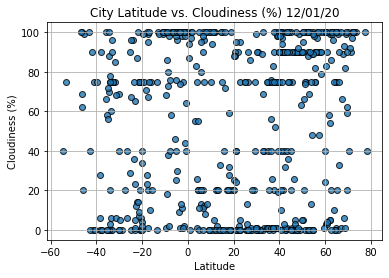

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

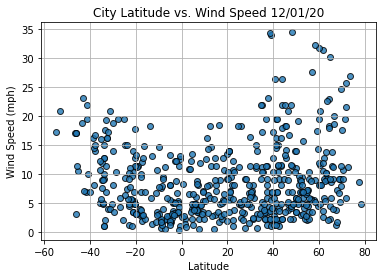

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linregress.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2020-12-02 02:18:29
Lat                         19.73
Lng                       -155.09
Max Temp                     80.6
Humidity                       57
Cloudiness                     20
Wind Speed                   9.17
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
533     True
534    False
535    False
536    False
537     True
Name: Lat, Length: 538, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Albany,US,2020-12-02 02:20:18,42.60,-73.97,41.00,52,32,1.01
9,Pavlodar,KZ,2020-12-02 02:20:18,52.30,76.95,-7.60,76,90,2.93
13,Hilo,US,2020-12-02 02:18:29,19.73,-155.09,80.60,57,20,9.17
14,Kapaa,US,2020-12-02 02:20:19,22.08,-159.32,80.60,69,90,8.05
15,Lagoa,PT,2020-12-02 02:20:19,39.05,-27.98,62.04,79,98,33.98


In [34]:
city_data_df.loc[(city_data_df["Lat"] < 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-12-02 02:17:42,-42.88,147.33,62.60,33,40,23.04
1,Punta Arenas,CL,2020-12-02 02:20:18,-53.15,-70.92,39.20,78,75,20.80
2,Ushuaia,AR,2020-12-02 02:17:59,-54.80,-68.30,37.40,94,40,17.22
4,Gizo,SB,2020-12-02 02:20:18,-8.10,156.84,85.57,67,98,3.87
5,Mar Del Plata,AR,2020-12-02 02:20:18,-38.00,-57.56,66.20,77,0,13.87


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

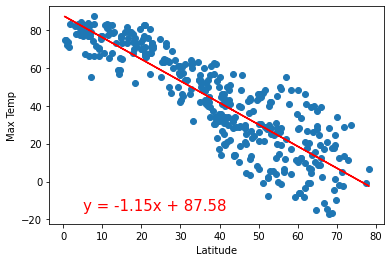

In [47]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,-15))

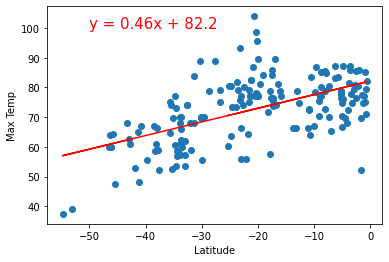

In [49]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))

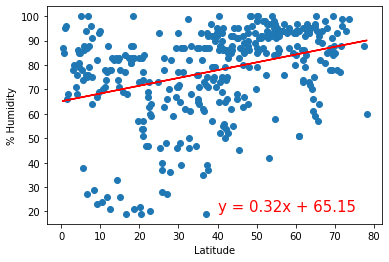

In [53]:
# Linear regression on the Northern Hemisphere on the percent humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

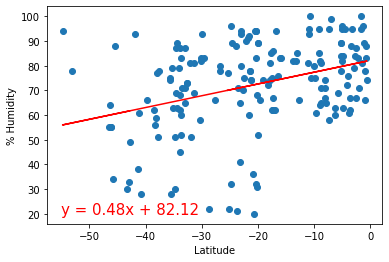

In [57]:
# Linear regression on the Southern Hemisphere on the percent humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

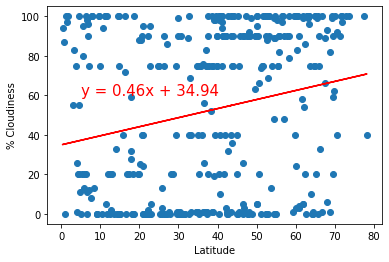

In [61]:
# Linear regression on the Northern Hemisphere on the percent cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,60))

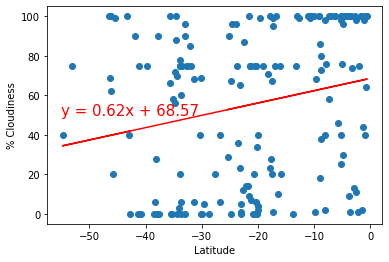

In [65]:
# Linear regression on the Southern Hemisphere on the percent cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

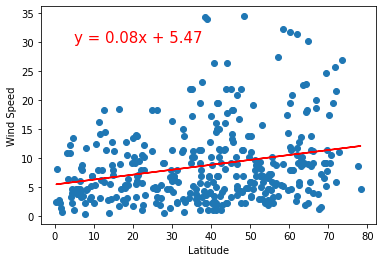

In [67]:
# Linear regression on the Northern Hemisphere on the wind speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,30))

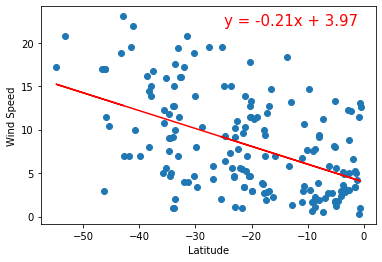

In [73]:
# Linear regression on the Southern Hemisphere on the wind speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,22))